In [32]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from util.plotting import plot_mobo_points_in_obj_space

2022-04-05 22:44:47.359140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 22:44:47.359202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-05 22:44:49.601347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-05 22:44:49.601411: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-05 22:44:49.601436: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-MGDBU2G): /proc/driver/nvidia/version does not exist
2022-04-05 22:44:49.601725: I tensorflow/core/platform/cpu_fe

In [2]:
async_observations = np.loadtxt("mo_lp/lunar_lander/async_observations.txt", delimiter=",")
async_query_points = np.loadtxt("mo_lp/lunar_lander/async_query_points.txt", delimiter=",")

sync_observations = np.loadtxt("mo_lp/lunar_lander/sync_observations.txt", delimiter=",")
sync_query_points = np.loadtxt("mo_lp/lunar_lander/sync_query_points.txt", delimiter=",")

ehvi_observations = np.loadtxt("mo_lp/lunar_lander/ehvi_observations.txt", delimiter=",")
ehvi_query_points = np.loadtxt("mo_lp/lunar_lander/ehvi_query_points.txt", delimiter=",")

In [23]:
def get_time_string(seconds):
    seconds = int(seconds)
    return f"{seconds // 3600}h {seconds % 3600 // 60}m {seconds % 60}s"

In [24]:
with open('mo_lp/lunar_lander/async_time.txt') as f:
    async_time = float(f.readline())

with open('mo_lp/lunar_lander/sync_time.txt') as f:
    sync_time = float(f.readline())
    
with open('mo_lp/lunar_lander/ehvi_time.txt') as f:
    ehvi_time = float(f.readline())

In [27]:
get_time_string(ehvi_time)

'1h 42m 22s'

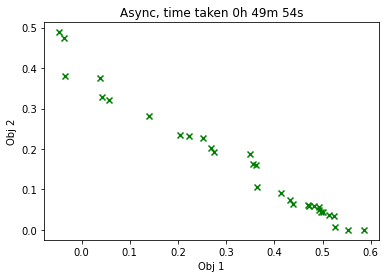

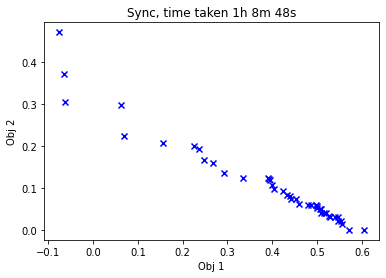

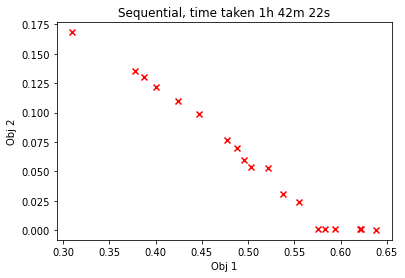

In [36]:
plot_mobo_points_in_obj_space(async_observations,
                              title=f"Async, time taken {get_time_string(async_time)}",
                              only_plot_pareto=True,
                              c_pareto='green');
plot_mobo_points_in_obj_space(sync_observations,
                              title=f"Sync, time taken {get_time_string(sync_time)}",
                              only_plot_pareto=True,
                              c_pareto='blue');
plot_mobo_points_in_obj_space(ehvi_observations,
                              title=f"Sequential, time taken {get_time_string(ehvi_time)}",
                              only_plot_pareto=True,
                              c_pareto='red');

Text(0.5, 1.0, 'Async, time taken 0h 49m 54s')

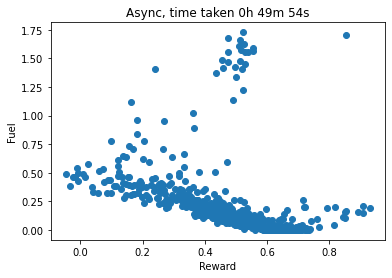

In [37]:
plt.scatter(async_observations[:1000,0], async_observations[:1000,1])
plt.xlabel("Reward")
plt.ylabel("Fuel")
plt.title(f"Async, time taken {get_time_string(async_time)}")

Text(0.5, 1.0, 'Sync, time taken 0h 49m 54s')

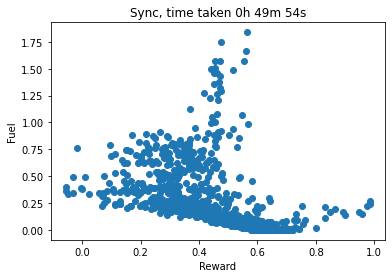

In [38]:
plt.scatter(sync_observations[:1000,0], sync_observations[:1000,1])
plt.xlabel("Reward")
plt.ylabel("Fuel")
plt.title(f"Sync, time taken {get_time_string(async_time)}")

Text(0.5, 1.0, 'Sequential, time taken 1h 42m 22s')

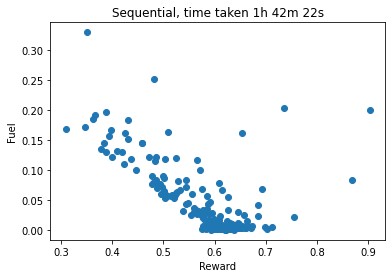

In [31]:
plt.scatter(ehvi_observations[:,0], ehvi_observations[:,1])
plt.xlabel("Reward")
plt.ylabel("Fuel")
plt.title(f"Sequential, time taken {get_time_string(ehvi_time)}")